   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

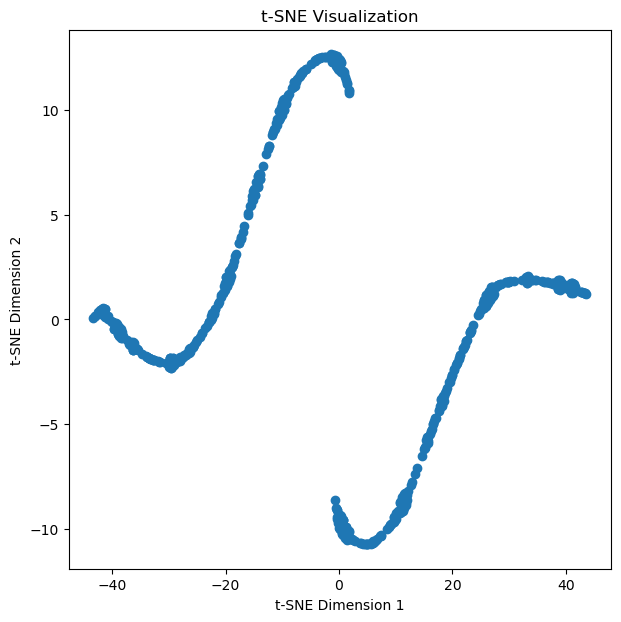

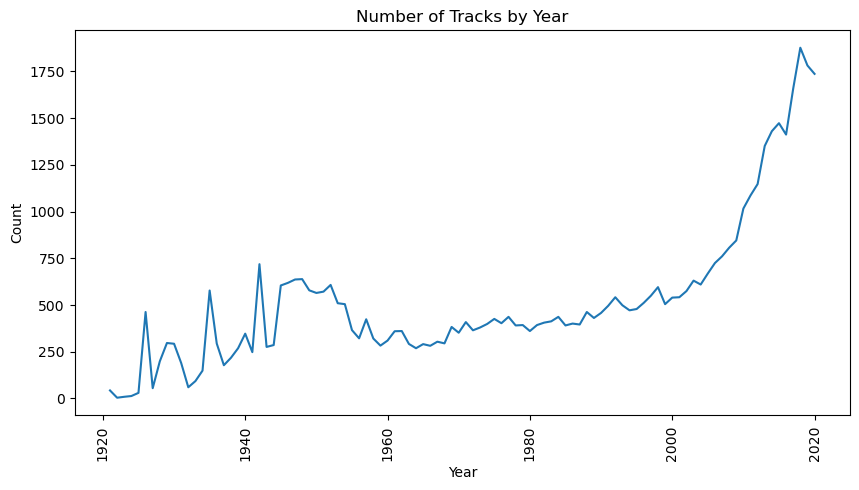

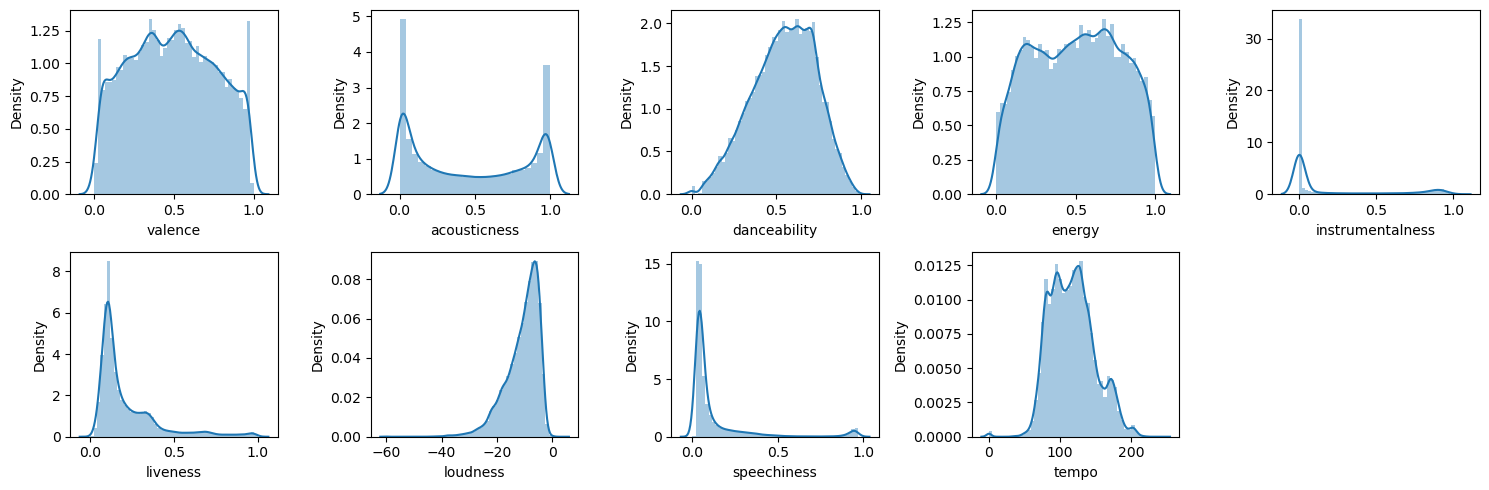

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

# Load tracks data
tracks = pd.read_csv('/kaggle/input/datapoints/data/data.csv')

# Explore tracks data
print(tracks.head())
print("Data Shape:", tracks.shape)
print("Data Info:")
print(tracks.info())
print("Missing Values:")
print(tracks.isnull().sum())

# Drop rows with missing values
tracks.dropna(inplace=True)

# Drop unnecessary columns
tracks = tracks.drop(['id', 'artists'], axis=1)

# Visualize t-SNE representation of tracks data
categorical_cols = ['key', 'mode']
one_hot_data = pd.get_dummies(tracks[categorical_cols])
numeric_data = tracks[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy']]
processed_data = pd.concat([numeric_data, one_hot_data], axis=1)

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(processed_data.head(500))

plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

# Visualize number of tracks by year
tracks = tracks.sort_values(by='year', ascending=False)
tracks.drop_duplicates(subset='duration_ms', keep='first', inplace=True)

plt.figure(figsize=(10, 5))
tracks_by_year = tracks['year'].value_counts().sort_index()
plt.plot(tracks_by_year.index, tracks_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Tracks by Year')
plt.xticks(rotation=90)
plt.show()

# Visualize distribution of float columns
floats = [col for col in tracks.columns if tracks[col].dtype == 'float']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset by genres
data_by_genres = pd.read_csv('/kaggle/input/datapoints/data/data_w_genres.csv')

# Select the columns for CountVectorizer
columns = ['mode', 'genres', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness']

# Filter the dataset to include only the selected columns
data = data_by_genres[columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Fit the CountVectorizer on the genres column
song_vectorizer = CountVectorizer()
song_vectorizer.fit(data['genres'])

# Test the CountVectorizer
print("Vocabulary Size:", len(song_vectorizer.vocabulary_))

# Load the dataset containing the 'genres' column
data_w_genres = pd.read_csv('/kaggle/input/datapoints/data/data_w_genres.csv')

# Sort the DataFrame by the 'genres' column in descending order and select the top 10,000 rows
tracks = data_w_genres.sort_values(by='genres', ascending=False).head(10000)


Vocabulary Size: 1632


In [20]:
import pandas as pd

# Load the dataset containing the 'genres' column
data_w_genres = pd.read_csv('/kaggle/input/datapoints/data/data_w_genres.csv')

def recommend_songs(genre, data, task=None):
    songs_in_genre = data[data['genres'].str.contains(genre)]

    if len(songs_in_genre) == 0:
        print(f"No songs found in the genre category: {genre}")
    else:
        if task is not None:
            # Modify recommendations based on the user's task
            if task == "workout":
                # If the user's task is workout, recommend energetic and up-tempo songs
                recommended_songs = songs_in_genre[songs_in_genre['energy'] > 0.8].head(5)[['genres', 'artists']]
            elif task == "study":
                # If the user's task is study, recommend calm and instrumental songs
                recommended_songs = songs_in_genre[songs_in_genre['instrumentalness'] > 0.5].head(5)[['genres', 'artists']]
            else:
                # For other tasks, recommend any top songs from the selected genre
                recommended_songs = songs_in_genre.head(5)[['genres', 'artists']]
        else:
            # If no specific task is given, recommend any top songs from the selected genre
            recommended_songs = songs_in_genre.head(5)[['genres', 'artists']]

        print("Recommended Songs:")
        for index, row in recommended_songs.iterrows():
            print(f"Genre: {row['genres']}, Artist: {row['artists']}")

# Get user input for the broad genre category
user_genre = input("Enter a broad genre category: ")

# Get user input for the task (optional)
user_task = input("Enter your current task (workout/study/other): ")

# Call the recommend_songs function with the user inputs
recommend_songs(user_genre, data_w_genres, task=user_task)


Enter a broad genre category:  funk
Enter your current task (workout/study/other):  driving


Recommended Songs:
Genre: ['g funk', 'hyphy', 'west coast trap'], Artist: 11/5
Genre: ['g funk', 'gangster rap', 'hip hop', 'rap', 'west coast rap'], Artist: 2Pac
Genre: ['alternative metal', 'alternative rock', 'funk metal', 'funk rock', 'modern rock', 'nu metal', 'pop rock', 'rap rock', 'reggae fusion', 'rock'], Artist: 311
Genre: ['g funk', 'hyphy', 'west coast rap', 'west coast trap'], Artist: 3X Krazy
Genre: ['boogie', 'disco', 'funk', 'post-disco'], Artist: A Taste Of Honey
